In [ ]:
import matplotlib.pyplot as plt # plotting
import numpy as np              # vectored math
import os                       # loading files
import pandas as pd             # dataframe management

In [ ]:
base_path = '../data/'
file_paths = os.listdir(base_path)

dfs = []
for file in file_paths:
    df_tmp = pd.read_parquet(os.path.join(base_path, file))
    dfs.append(df_tmp)

df = pd.concat(dfs)
df.dropna(subset='slot_time_ms', inplace=True) 
# drop any empty bid timing data (relay data API issues etc.)

df.sort_values(by=['block_number', 'bid_timestamp_ms'], ascending=True, inplace=True)
df.drop_duplicates(subset='block_hash', keep='first', inplace=True) 
# keep only the earliest bid arrival at any relay

df.reset_index(inplace=True, drop=True)

In [ ]:
# Keep 30 days of data

t_30 = df['block_datetime'].max() - pd.Timedelta(30, 'd')
tmp = df[df['block_datetime'] > t_30]
tmp['block_datetime'].min(), tmp['block_datetime'].max()

(Timestamp('2025-02-14 00:00:11'), Timestamp('2025-03-15 23:59:59'))

In [28]:
tmp['proposer_label'].value_counts().head(10)

proposer_label
lido          49247
coinbase      10848
ether.fi       7038
binance        6015
kiln           5681
figment        4109
rocketpool     3273
staked.us      2955
everstake      2910
kraken         2816
Name: count, dtype: int64

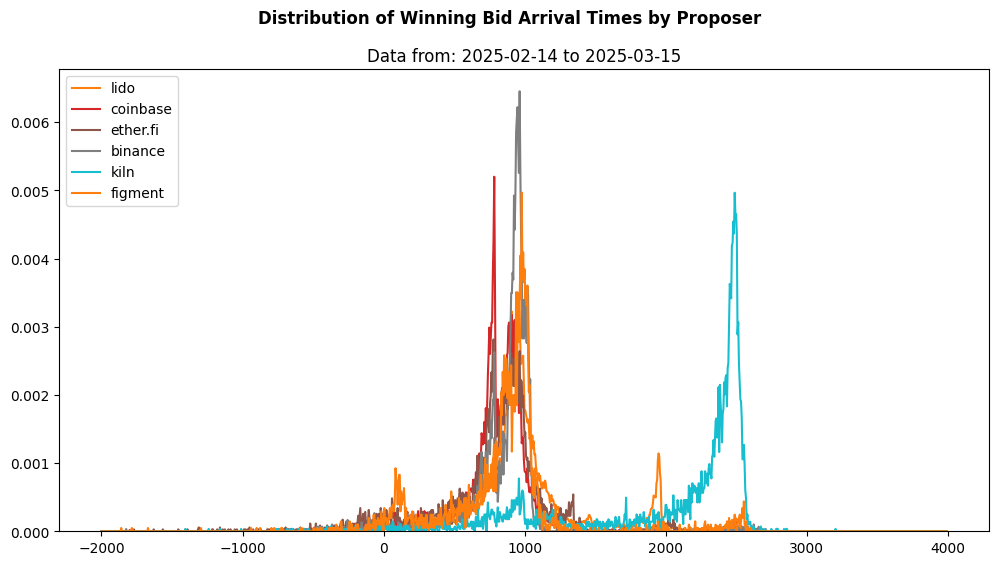

In [ ]:
fig = plt.figure(figsize = (12, 6))
plt.suptitle('Distribution of Winning Bid Arrival Times by Proposer', weight = 600)
plt.title(f"Data from: {tmp['block_datetime'].min().date()} to {tmp['block_datetime'].max().date()}")

bid_bins = np.arange(-2000, 4000, 5)
for proposer in tmp['proposer_label'].value_counts().head(6).index:
    df_entity = tmp[tmp['proposer_label'] == proposer]
    
    phist = plt.hist(df_entity['slot_time_ms'], bins = bid_bins, alpha = 0, density=True)
    plt.plot(phist[1][:-1], phist[0], label = proposer)


plt.legend(loc = 'upper left')
plt.ylim(0, None)
plt.show()